In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('/train.csv')

# Preview
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Dataset structure
df.info()

# Missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with most common (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Convert categorical data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

<ipython-input-7-d2bbcf454999>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-d2bbcf454999>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline

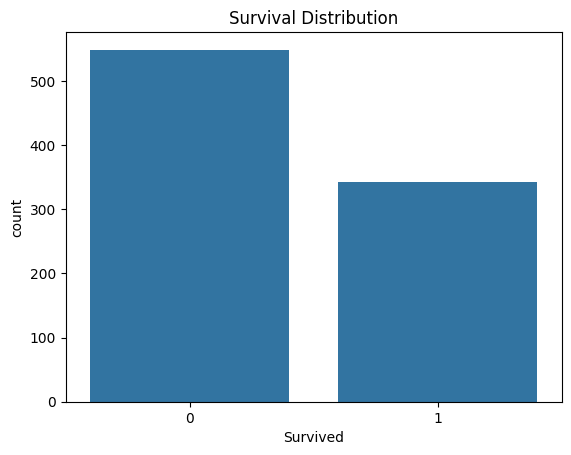

In [9]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

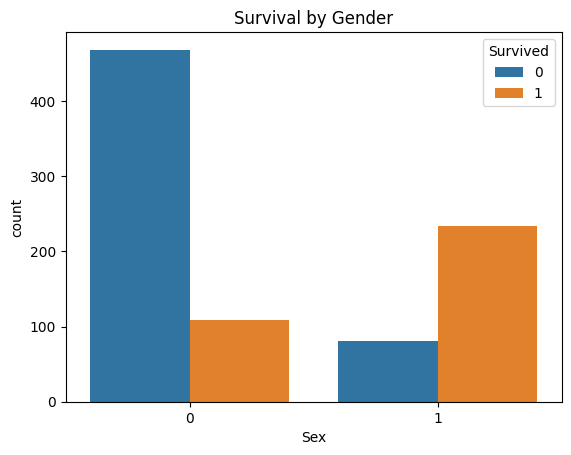

In [10]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

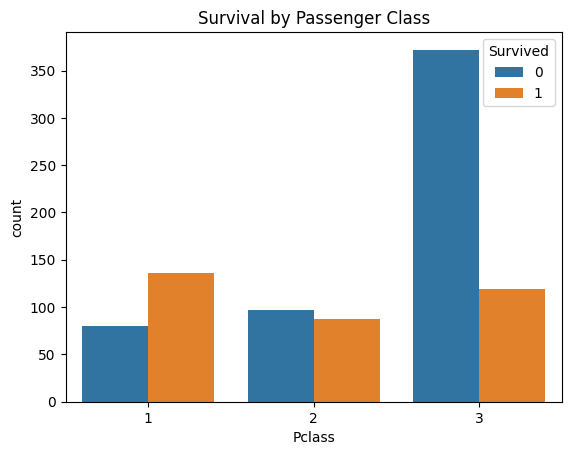

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

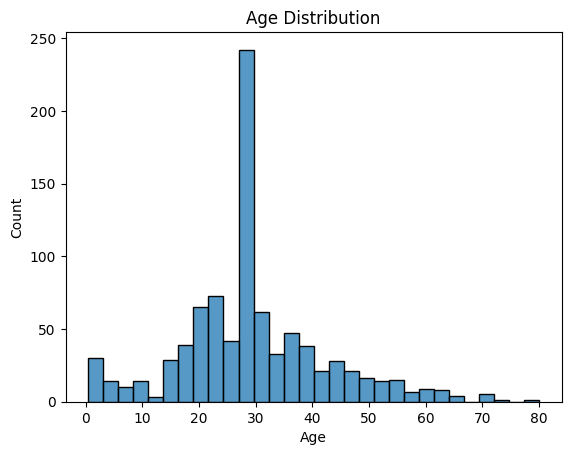

In [12]:
sns.histplot(df['Age'], bins=30)
plt.title("Age Distribution")
plt.show()

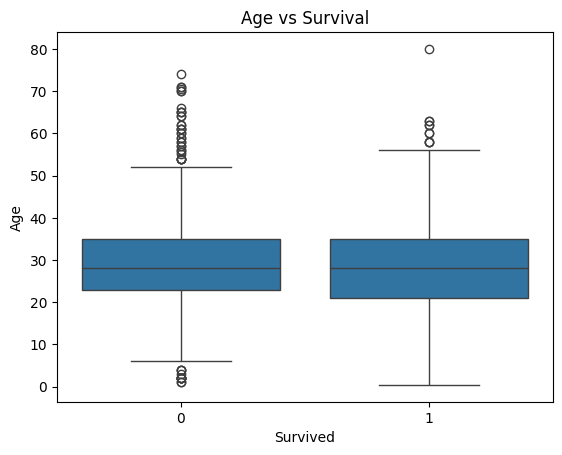

In [13]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

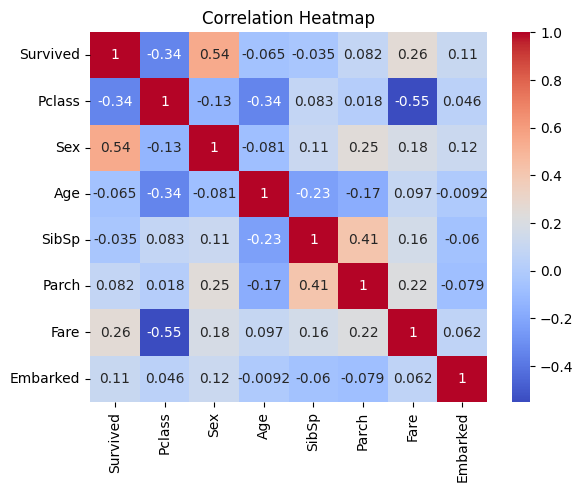

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns that shouldn't be included in correlation
corr_df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# Compute and plot the correlation heatmap
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
corr_df = df.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns


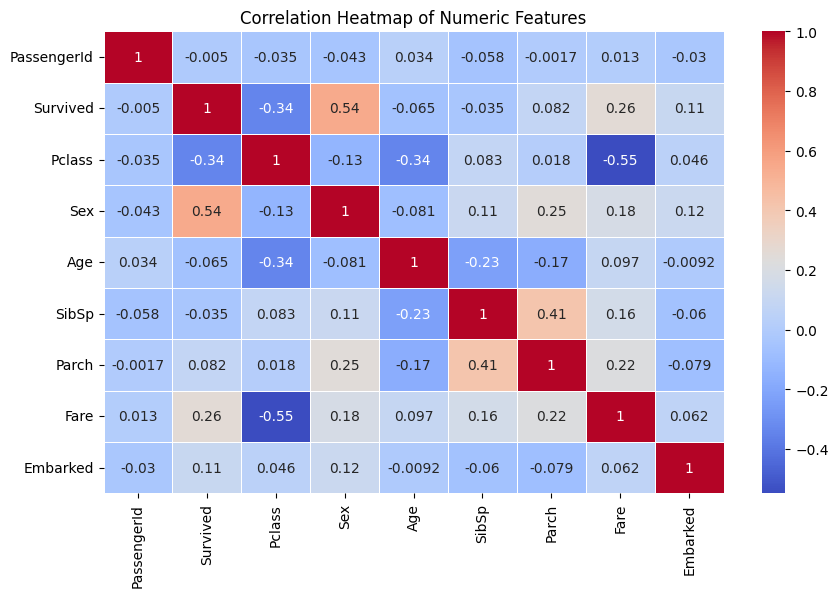

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [20]:
corr_with_survived = corr_df.corr()['Survived'].sort_values(ascending=False)
print(corr_with_survived)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


In [21]:
!pip install plotly

In [22]:
import pandas as pd
import plotly.express as px

In [23]:
fig = px.scatter_3d(df,
                    x='Age',
                    y='Fare',
                    z='Pclass',
                    color='Survived',
                    symbol='Sex',
                    hover_data=['Name', 'Sex', 'Embarked'])

fig.update_layout(title='3D Titanic Passenger Visualization')
fig.show()

In [24]:
import numpy as np

# Create layout positions for each passenger
df['x_layout'] = np.arange(len(df)) % 30  # 30 passengers per row
df['y_layout'] = np.arange(len(df)) // 30  # rows

In [25]:
fig2 = px.scatter(df,
                 x='x_layout',
                 y='y_layout',
                 color='Sex',
                 symbol='Sex',
                 hover_data=['Name', 'Age', 'Survived'],
                 labels={'x_layout': 'Titanic Deck Columns', 'y_layout': 'Titanic Deck Rows'})

fig2.update_layout(
    title="Titanic Passenger Layout by Gender",
    yaxis=dict(autorange="reversed"),  # So row 0 is at top
    height=600,
    width=900,
    showlegend=True
)

fig2.show()

In [26]:
fig3 = px.scatter(df,
                  x='x_layout', y='y_layout',
                  color='Survived',
                  symbol='Sex',
                  facet_col='Survived',
                  hover_data=['Name', 'Age', 'Fare'])

fig3.update_layout(
    title="Titanic Passenger Layout Split by Survival",
    yaxis=dict(autorange="reversed"),
    height=600
)

fig3.show()